Name: Yilin Pu

Github Username: pyl32

USC ID: 2952467624

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Vertebral Column Data Set
This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0 and AB=1



(a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.

(b) Pre-Processing and Exploratory data analysis:

i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [2]:
#i.
col_name = ['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','grade_of_spondylolisthesis','class_labels']
data = pd.read_csv('column_2C.dat', sep=' ',header=None, names = col_name)
df = pd.DataFrame(data)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class_labels
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


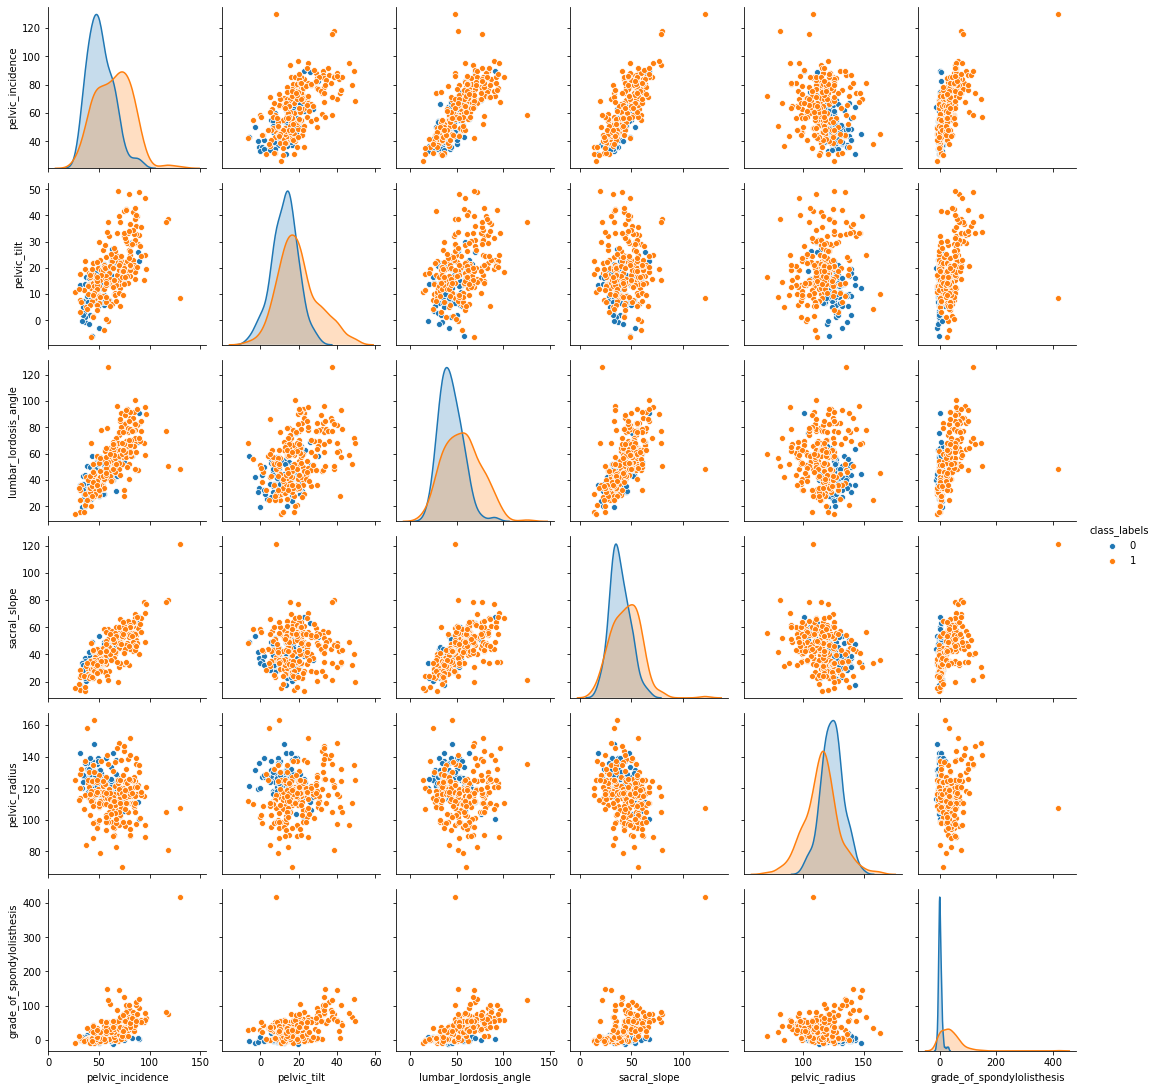

In [3]:
df.loc[df["class_labels"] == "NO", "class_labels"] = 0
df.loc[df["class_labels"] == "AB", "class_labels"] = 1
df
pairplot = sns.pairplot(df,hue='class_labels')
plt.show()

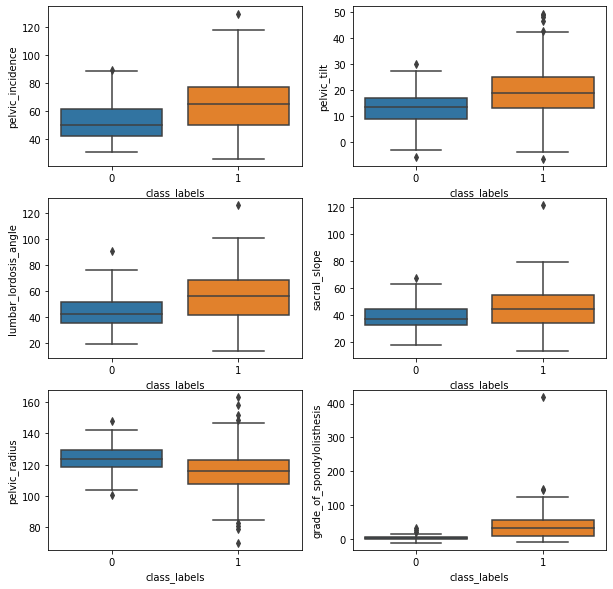

In [4]:
#ii.

fig, axes = plt.subplots(3, 2, figsize=(10, 10))

for i in range(6):
    sns.boxplot(x="class_labels", y=col_name[i], data=df, ax=axes[i // 2, i % 2])

plt.show()

In [5]:
#iii.
train_set_0 = df[df["class_labels"] == 0].iloc[:70, :]
train_set_1 = df[df['class_labels'] == 1].iloc[:140,:]
train_set = pd.concat([train_set_0,train_set_1]) 
train_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class_labels
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09,1
136,88.02,39.84,81.77,48.18,116.60,56.77,1
137,83.40,34.31,78.42,49.09,110.47,49.67,1
138,72.05,24.70,79.87,47.35,107.17,56.43,1


In [31]:
test_set_0 = df[df["class_labels"] == 0].iloc[70:, :]
test_set_1 = df[df['class_labels'] == 1].iloc[140:,:]
test_set = pd.concat([test_set_0,test_set_1]) 
test_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class_labels
280,50.09,13.43,34.46,36.66,119.13,3.09,0
281,64.26,14.50,43.90,49.76,115.39,5.95,0
282,53.68,13.45,41.58,40.24,113.91,2.74,0
283,49.00,13.11,51.87,35.88,126.40,0.54,0
284,59.17,14.56,43.20,44.60,121.04,2.83,0
...,...,...,...,...,...,...,...
205,80.11,33.94,85.10,46.17,125.59,100.29,1
206,95.48,46.55,59.00,48.93,96.68,77.28,1
207,74.09,18.82,76.03,55.27,128.41,73.39,1
208,87.68,20.37,93.82,67.31,120.94,76.73,1


(c) Classification using KNN on Vertebral Column Data Set

i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

ii. Test all the data in the test database with k nearest neighbors. Take de- cisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Cal- culate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.

iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}. Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

In [63]:
#i.
## use sklearn package to calculate knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

x_train = train_set.iloc[:,:6]
y_train = list(train_set.iloc[:,6])
x_test = test_set.iloc[:,:6]
y_test = list(test_set.iloc[:,6])
k = 6
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_test,y_test)
y_predict = knn.predict(x_test)

According to the result above, the most suitable k value is 4


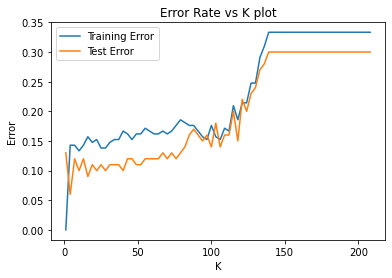

In [10]:
#ii.
##Test all data from 208 to 1
k_range=range(208,0,-3)

train_e = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_train)
    train_score = metrics.accuracy_score(y_train,y_predict)
    train_err = 1 - train_score
    train_e.append(train_err)

test_e = []
max = 0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    test_score = metrics.accuracy_score(y_test,y_predict)
    test_err = 1 - test_score
    test_e.append(test_err)
    if test_score > max:
        max = test_score
        best = k

print("According to the result above, the most suitable k value is", best)


plt.plot(k_range, train_e, label="Training Error")
plt.plot(k_range, test_e, label="Test Error")
plt.xlabel("K")
plt.ylabel("Error")
plt.title("Error Rate vs K plot")
plt.legend()

plt.show()

In [30]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_predict)
print("The confusion matrix is\n",confusion_mat)

##true positive rate, true negative rate, precision, and F1-score when k = k∗.

tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
precision = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
print("\n The true positive rate:",tpr,"\n","The true negative rate:",tnr,"\n",
      "The precision:",precision,"\n","The F1-score:",f1,"\n")

The confusion matrix is
 [[25  5]
 [ 1 69]]

 The true positive rate: 0.9857142857142858 
 The true negative rate: 0.8333333333333334 
 The precision: 0.9324324324324325 
 The F1-score: 0.9583333333333333 



The best k values: [1, 6, 1, 11, 26, 21, 26, 31, 41, 6, 6, 16, 16, 16, 16, 6, 6, 6, 6, 6, 6]


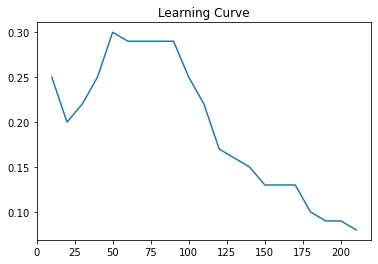

In [57]:
#iii
import math
from sklearn.neighbors import KNeighborsClassifier


n_range = range(10,211,10)
Best_error = []
Best_k = []



for n in n_range:
    n1 = math.floor(n/3)
    n2 = n - n1
    
    train_set_new = pd.concat([df[df["class_labels"] == 0].iloc[:n1, :], 
                               df[df["class_labels"] == 1].iloc[:n2, :]])
    
    test_set_new = pd.concat([df[df["class_labels"] == 0].iloc[70:, :],
                              df[df["class_labels"] == 1].iloc[140:, :]])
    
    x_train_new = train_set_new.iloc[:,:6]
    y_train_new = list(train_set_new.iloc[:,6])
    x_test_new = test_set_new.iloc[:,:6]
    y_test_new = list(test_set_new.iloc[:,6])
    
    k_range = range(1,n,5)
    i=100
    
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train_new, y_train_new)
        y_predict_new = knn.predict(x_test_new)
        
        test_score = metrics.accuracy_score(y_test_new,y_predict_new)
        test_error = 1 - test_score

        if test_error < i:
            i = test_error
            best_kk = k
   
    Best_k.append(best_kk)
    Best_error.append(i)
    
print("The best k values:", Best_k)


plt.plot(n_range,Best_error)
plt.title("Learning Curve") 
plt.show()


(d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

i. Minkowski Distance:

A. which becomes Manhattan Distance with p = 1.

B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

C. which becomes Chebyshev Distance with p → ∞ 

ii. Mahalanobis Distance.

In [110]:
#i.A Manhattan Distance with p = 1.

k_range_Man=range(1,197,5)
error_Man = []
i = 0

for k in k_range_Man:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    test_score = metrics.accuracy_score(y_test,y_predict)
    test_error = 1 - test_score
    error_Man.append(test_error)
    
    if test_score > i:
        i = test_score
        Best_k_Man = k


print("The test errors:", error_Man,"\n")
print("The best k value:", Best_k_Man)
print("The best error:", min(error_Man))


The test errors: [0.12, 0.10999999999999999, 0.10999999999999999, 0.12, 0.12, 0.10999999999999999, 0.12, 0.13, 0.13, 0.13, 0.14, 0.13, 0.15000000000000002, 0.15000000000000002, 0.14, 0.14, 0.16000000000000003, 0.15000000000000002, 0.19999999999999996, 0.19999999999999996, 0.21999999999999997, 0.20999999999999996, 0.22999999999999998, 0.20999999999999996, 0.21999999999999997, 0.24, 0.28, 0.28, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004] 

The best k value: 6
The best error: 0.10999999999999999


In [111]:
#i.B. log10(p) ∈ {0.1,0.2,0.3,...,1}

p_values = np.logspace(0.1, 1, 10)
error_Min = []
i = 0

for p in p_values:
    knn = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=p )
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    test_score = metrics.accuracy_score(y_test,y_predict)
    test_error = 1 - test_score
    error_Min.append(test_error)
    
    if test_score > i:
        i = test_score
        best_p = p

best_pp = math.log(best_p,10)

print("The test errors:", error_Min)

print("The best log10(p):", best_pp, " and p value = ",best_p)
print("The best error:", min(error_Min))

The test errors: [0.08999999999999997, 0.08999999999999997, 0.07999999999999996, 0.07999999999999996, 0.07999999999999996, 0.06000000000000005, 0.06999999999999995, 0.07999999999999996, 0.08999999999999997, 0.08999999999999997]
The best log10(p): 0.6  and p value =  3.9810717055349722
The best error: 0.06000000000000005


In [112]:
#i.C. Chebyshev Distance with p → ∞ 

k_range_Man=range(1,197,5)
error_Che = []
i = 0

for k in k_range_Man:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    test_score = metrics.accuracy_score(y_test,y_predict)
    test_error = 1 - test_score
    error_Che.append(test_error)
    
    if test_score > i:
        i = test_score
        Best_k = k


print("The test errors:", error_Che,"\n")
print("The best k value:", Best_k)
print("The best error:", min(error_Che))

The test errors: [0.13, 0.09999999999999998, 0.12, 0.07999999999999996, 0.10999999999999999, 0.12, 0.12, 0.09999999999999998, 0.13, 0.12, 0.12, 0.12, 0.14, 0.13, 0.14, 0.10999999999999999, 0.14, 0.12, 0.15000000000000002, 0.14, 0.18999999999999995, 0.18000000000000005, 0.18000000000000005, 0.18000000000000005, 0.20999999999999996, 0.20999999999999996, 0.25, 0.28, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004] 

The best k value: 16
The best error: 0.07999999999999996


In [114]:
#ii.Mahalanobis Distance.


Cov = np.cov(x_train, rowvar=False)
inverse = np.linalg.inv(Cov)
error_Mah = []
i = 0

for k in k_range_Man:
    knn = KNeighborsClassifier(n_neighbors=k, metric="mahalanobis", metric_params={'VI':inverse})
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    test_score = metrics.accuracy_score(y_test,y_predict)
    test_error = 1 - test_score
    error_Mah.append(test_error)
    
    if test_score > i:
        i = test_score
        Best_k = k

print("\nThe test errors:", error_Mah,"\n")
print("The best k values:", Best_k, "and 6") ## 1 and 6 is best k since test error is 0.17
print("The best error:", min(error_Mah))


The test errors: [0.17000000000000004, 0.17000000000000004, 0.19999999999999996, 0.19999999999999996, 0.20999999999999996, 0.19999999999999996, 0.22999999999999998, 0.20999999999999996, 0.24, 0.24, 0.24, 0.26, 0.25, 0.27, 0.26, 0.25, 0.24, 0.26, 0.26, 0.26, 0.28, 0.28, 0.31000000000000005, 0.29000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004] 

The best k values: 1 and 6
The best error: 0.17000000000000004


In [136]:
# summarize the results

sum_table=pd.DataFrame([["6","6","16","1 and 6"],
                       [min(error_Man), min(error_Min), min(error_Che), min(error_Mah)]],
                   columns=["Manhattan", "Minkowski", "Chebyshev", "Mahalanobis"], index=["Best k vals","Best error"])

sum_table

,Manhattan,Minkowski,Chebyshev,Mahalanobis
Best k vals,6,6,16,1 and 6
Best error,0.1,0.06,0.11,0.17


(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}

In [139]:
#Euclidean
k_range_Man=range(1,197,5)
error_E = []
i = 0

for k in k_range_Man:
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    test_score = metrics.accuracy_score(y_test,y_predict)
    test_error = 1 - test_score
    error_E.append(test_error)
    
    if test_score > i:
        i = test_score
        Best_k_E = k


print("Use weighted voting with Euclidean distance")
print("The best k value:", Best_k_E)
print("The best error:", min(error_E),"\n")


#Manhattan
error_Man = []
i = 0

for k in k_range_Man:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan',weights='distance')
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    test_score = metrics.accuracy_score(y_test,y_predict)
    test_error = 1 - test_score
    error_Man.append(test_error)
    
    if test_score > i:
        i = test_score
        Best_k_Man = k


print("Use weighted voting with Manhattan distance")
print("The best k value:", Best_k_Man)
print("The best error:", min(error_Man),"\n")


#Chebyshev
error_Che = []
i = 0

for k in k_range_Man:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev',weights='distance')
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    test_score = metrics.accuracy_score(y_test,y_predict)
    test_error = 1 - test_score
    error_Che.append(test_error)
    
    if test_score > i:
        i = test_score
        Best_k = k

print("Use weighted voting with Chebyshev distance")
print("The best k value:", Best_k)
print("The best error:", min(error_Che))

# summarize the results

sum_table1=pd.DataFrame([["6","26","16"],
                       [min(error_E), min(error_Man), min(error_Che)]],
                   columns = ["Euclidean", "Manhattan","Chebyshev"], index=["Best k vals","Best error"])

sum_table1

Use weighted voting with Euclidean distance
The best k value: 6
The best error: 0.09999999999999998 

Use weighted voting with Manhattan distance
The best k value: 26
The best error: 0.09999999999999998 

Use weighted voting with Chebyshev distance
The best k value: 16
The best error: 0.10999999999999999


,Euclidean,Manhattan,Chebyshev
Best k vals,6,26,16
Best error,0.1,0.1,0.11


(f) What is the lowest training error rate you achieved in this homework?

The lowest trainning error rate is 0 where k=1.